# Lecture 10: Introduction to artificial neural networks (ANNs)

In [1]:
import datetime
now = datetime.datetime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2019-01-08 10:31:29


# Biological inspiration

Architecture of neural networks originally inspired by the brain.


## Rewriting the brain


<center><img src="Lecture10_Images/brain_rewriting_auditory.png" style="height: 300px;"/></center>

Study performed with ferrets by [Roe et al. (1992)](https://www.ncbi.nlm.nih.gov/pubmed/1527604).

[[Image credit](https://www.coursera.org/learn/machine-learning)]

<center><img src="Lecture10_Images/brain_rewriting_somatosensory.png" style="height: 300px;"/></center>

Study performed with hamsters by [Metin & Frost (1989)](https://www.ncbi.nlm.nih.gov/pubmed/2911580).

[[Image credit](https://www.coursera.org/learn/machine-learning)]

Led to "*one learning algorithm*" hypothesis.

## Biological neurons

<center><img src="Lecture10_Images/Blausen_0657_MultipolarNeuron.png" style="height: 200px;"/></center>

[Image credit: [Bruce Blaus, Wikipedia](https://en.wikipedia.org/wiki/Neuron)]

Biological neurons consist of cell body containing nucleus, dentrite branches (inputs) and axon (output). 

Axon connects neurons and the length of the axon can be a few to 10,000 times the size of the cell body.

Axon splits into telodendria branch, with synaptic terminals at ends, which are connected to dendrites of other neurons.


Although biological neurons rather simple, complexity comes from networks of billions of neurons, each connected to thousands of other neurons.

# Artificial neurons (units) and networks

## Perceptron

<center><img src="Lecture10_Images/perceptron.png" style="height: 400px;"/></center>

[[Image credit](https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/)]

## General logistic unit

<center><img src="Lecture10_Images/general_logistic_unit.png" style="height: 200px;"/></center>


*Weighted sum*:
$$z = \sum_{j=1}^n \theta_j x_j =\theta^{\rm T} x.$$

*Activations*:
$$a = h(z),$$
for non-linear activation function $h$.

Generally we refer to as a logistic unit (rather than an artificial neuron) since additional generalities than concepts motivated by biology will be considered.

## Examples of activation functions

Step
$$ a(z) = \left \{
\begin{eqnarray}
0,\ \text{if}\ z < 0\\
1,\ \text{if}\ z \geq 0 \\
\end{eqnarray}
\right. 
$$

Sigmoid
$$
a(z) = \frac{1}{1+\exp{(-z)}}
$$

Hyperboic tangent
$$
a(z) = \tanh(z)
$$

Rectified linear unit (ReLU)
$$
a(z) = \max(0, z)
$$


### Exercise: plot the activiation functions specified above over domain [-5, 5].

In [1]:
# Common imports
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def step(z):
    return (np.sign(z)+1)*0.5

[-5, 5, -1.2, 1.2]

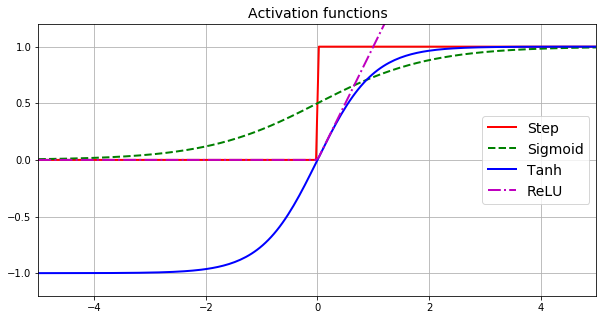

In [3]:
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(10,5))
plt.plot(z, step(z), "r-", linewidth=2, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

### Gradients of activation functions

In [5]:
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

[-5, 5, -0.2, 1.2]

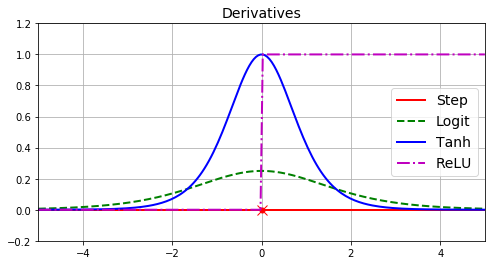

In [6]:
plt.figure(figsize=(8,4))
plt.plot(z, derivative(step, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

Notice the step function has zero gradient.

## Neural network

Construct artifical neural network by combining layers of multiple logistic units.

<center><img src="Lecture10_Images/ann.png" style="height: 200px;"/></center>

*Weighted sums*:
$$z_j = \sum_{i=1}^n \theta_{ij} x_i$$

*Activations*:
$$a_j = h(z_j)$$



## Architectures and terminology

<center><img src="Lecture10_Images/ann_layers.jpg" style="height: 300px;"/></center>

[[Image credit](https://medium.com/@xenonstack/overview-of-artificial-neural-networks-and-its-applications-2525c1addff7)]

Networks can be wide/narrow and deep/shallow.

Here we consider feedforward network only.  Other configurations can also be considered, as we will see later in the course.

## Universal approximation theorem

The *universal approximation theorem* states that a feedforward network *can* accurately approximate any continuous function from one finite dimensional space to another, given enough hidden units (Hornik et al. 1989, Cybenko 1989).

(Some technical caveats that are beyond the scope of this course regarding properties of the mapping and activation functions.)

ANNs thus have the *potential* to be universal approximators.  

Universal approximation theorem does *not* provide any guarantee that training finds this representation.

## Multi-class classification

Multi-class classification can be easily performed with an ANN, where each output node corresponds to a certain class.

<center><img src="Lecture10_Images/ann_layers_multiclass_classification.jpg" style="height: 300px;"/></center>

[[Image credit (adapted)](https://medium.com/@xenonstack/overview-of-artificial-neural-networks-and-its-applications-2525c1addff7)]

Set up training data as unit vectors, with 1 for the target class and 0 for all other classes.

## Softmax

Map predictions to *"probabilities"* using the softmax function for all output nodes with activiations $a_j$:

$$ 
\hat{p}_j = \frac{\exp(a_j)}{\sum_{j^\prime} \exp(a_{j^\prime})}
.
$$

Normalised such that
- $\sum_j \hat{p}_j=1$
- $0 \leq \hat{p}_j \leq 1$

# Cost functions

Appropriate cost functions depend on whether performing regression or classification.  Consider targets $y_j^{(i)}$ and outputs (predictions) of ANN $\hat{p}_j^{(i)}$, for training instance $i$ and output node $j$.

Typical cost function for regression is the mean square error: 
$$\text{MSE}(\Theta) = \frac{1}{m} \sum_{i} \sum_{j} \left(\hat{p}_j^{(i)} - y_j^{(i)}\right)^2 .$$

Typical cost function for classification is cross-entropy:
$$
C(\Theta) = -\frac{1}{m} \sum_{i} \sum_{j} y_j^{(i)} \log \left(\hat{p}_j^{(i)}\right)
.
$$

(Although other cost functions are used widely.)

Various forms of regularisation often considered, e.g. $\ell_2$ regularisation.

Error surface non-convex, potentially with many local optima.  Historically training ANNs has been difficult.

# Backpropagation

## Problem

To train ANN's want to exploit gradient of error surface (e.g. for gradient descent algorithms).  Therefore need an efficient method to compute gradients.

Backpropagation algorithm developed by [Rumelhart, Hinton & Williams (1986)](https://www.nature.com/articles/323533a0) to efficiently compute the gradient of the error surface (i.e. cost function) with respect to each weight of the network.

Gradients then accessible for training.

## Overview of backpropagation

Backpropagation consists of forward and reverse (backwards) passes (hence name).

Consider each training instance.  A forward run of the network is applied to compute the output error $\epsilon$.  Then errors are backpropagated through the network to compute the rate of change of the error with respect to the weights of the network.

In practice, error gradients $\frac{\partial \epsilon}{\partial z_j}$ are computed and backpropagated, from which error gradients with respect to the weights can be computed $\frac{\partial \epsilon}{\partial \theta_{ij}}$.

Backpropagation algorithm follows from a straightforward application of the chain rule.

## Define network architecture and notation

<center><img src="Lecture10_Images/backpropagation_architecture2.png" style="height: 200px;"/></center>

Now make network layer explicit in notation.

Weighted sum:
$$
z_j^l = \sum_i \theta_{ij}^l a_i^{l-1} ,
$$
where $\theta_{ij}^l$ is the weight between node $i$ at layer $l-1$ and node $j$ at layer $l$ (note that difference conventions are often used, e.g. $\theta_{ji}^{l-1}$ for the same connection). Consider $L$ layers.

Activations:
$$
a_i^l = h(z_i^l) .
$$



## Backpropagation

Want to compute

$$\Delta \theta_{ik}^l = -\eta \frac{\partial \epsilon}{\partial \theta_{ij}^l}.$$

By chain rule:
$$\frac{\partial \epsilon}{\partial \theta_{ij}^l}=\frac{\partial \epsilon}{\partial z_{j}^l}\frac{\partial z_{j}^l}{\partial \theta_{ij}^l}=\frac{\partial \epsilon}{\partial z_{j}^l}a_{i}^{l-1}=\delta_{i}^l a_{i}^{l-1}, $$

where $$\delta_i^l = \frac{\partial \epsilon}{\partial z_{j}^l}$$

$\left(
\text{recall}\ 
z_j^l = \sum_i \theta_{ij}^l a_i^{l-1}
\right)$.

Now need to compute

$$\delta_i^l = \frac{\partial \epsilon}{\partial z_{j}^l} .$$

### Functional dependence

<center><img src="Lecture10_Images/backpropagation_functional_dependence2.png" style="height: 300px;"/></center>

By chain rule again:

$$\delta_i^l = \frac{\partial \epsilon}{\partial z_{j}^l} = \sum_i \frac{\partial \epsilon}{\partial z_{i}^{l+1}} \frac{\partial z_{i}^{l+1}}{\partial a_{j}^l} \frac{\partial a_{j}^l}{\partial z_{j}^l} = \sum_i \delta_i^{l+1} \theta_{ji}^{l+1} h^\prime(z_j^l).$$

Note the term $h^\prime(z_j^l)$ is independent of $i$ and so can be moved outside the summation.

Boundary condition:

$$\delta_i^L = \frac{\partial \epsilon}{\partial z_{j}^L} = \frac{\partial \epsilon}{\partial a_{j}^L} \frac{\partial a_{j}^L}{\partial z_{j}^L} = \frac{\partial \epsilon}{\partial a_{j}^L} h^\prime(z_j^L).$$

## Summary of backpropagation

For current set of weights $\theta_{ij}^l$, compute forward pass through network:
$$z_j^l = \sum_i \theta_{ij}^l a_i^{l-1} ,$$
$$a_i^l = h(z_i^l) .$$

Propagate errors backwards through network:
$$\delta_i^l = \frac{\partial \epsilon}{\partial z_{j}^l}=\sum_i \delta_i^{l+1} \theta_{ji}^{l+1} h^\prime(z_j^l) .$$

Compute derivatives of error with respect to weights:
$$\frac{\partial \epsilon}{\partial \theta_{ij}^l} = \delta_i^l a_i^{l-1}.$$

## Training with backpropagation

Backpropagation simply computes derivatives of error with respect to weights.

Still need training algorithm to update weights given derivatives, e.g. $\Delta \theta_{ik}^l = -\eta \frac{\partial \epsilon}{\partial \theta_{ij}^l}.$  


Various approaches can be considered:
- Online: update weights after each training instance.
- Full-batch: update weights after full sweep through training data.
- Mini-batch: update weights after a small sample of training cases.

### Example

Scikit-learn now supports ANNs but not intended for large scale problems. 

Trains using some form of gradient descent, with gradients computed by backpropagation.

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320


/Users/mcewen/anaconda3/envs/tensorflow_py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.985733
Test set score: 0.971000
